Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing dataset

In [2]:
dataset = pd.read_csv('/kaggle/input/Mall_Customers.csv')

In [3]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
dataset.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There is no null value in the dataset

Creating array(X) with **Annual Income** and **Spending Score **

In [5]:
X = dataset.iloc[:, [3, 4]].values

Finding the value of **k** with the help of **WCSS** and **Elbow Method**

In [6]:
from sklearn.cluster import KMeans
wcss = [] #Within Cluster Sum of Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

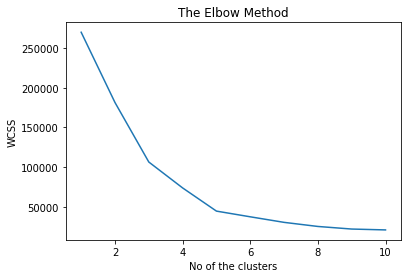

In [7]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('No of the clusters')
plt.ylabel('WCSS')

plt.show()

We know know that the optimal value of **k** is **5**. We will fit our model on k = 5 and predict the results

In [8]:
kmeans = KMeans(n_clusters = 5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

Now, we will plot our results 

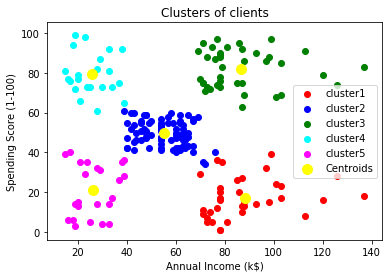

In [9]:
plt.scatter(X[y_kmeans ==  0, 0], X[y_kmeans ==  0, 1], c = 'red', label = 'cluster1')
plt.scatter(X[y_kmeans ==  1, 0], X[y_kmeans ==  1, 1], c = 'blue', label = 'cluster2')
plt.scatter(X[y_kmeans ==  2, 0], X[y_kmeans ==  2, 1], c = 'green', label = 'cluster3')
plt.scatter(X[y_kmeans ==  3, 0], X[y_kmeans ==  3, 1], c = 'cyan', label = 'cluster4')
plt.scatter(X[y_kmeans ==  4, 0], X[y_kmeans ==  4, 1], c = 'magenta', label = 'cluster5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Here,

**y_kmeans ==  0** is value of y_kmeans for cluster 0

**X[y_kmeans ==  0]** is X for cluster 0

**X[y_kmeans ==  0, 0]** first item of the X for cluster 0


Moreover, we will change the labels of our clusters to match with the insights we got from it

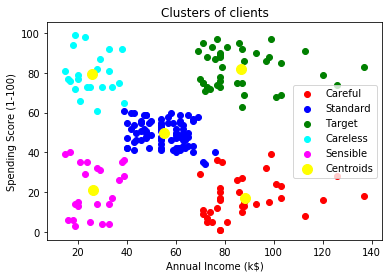

In [10]:
plt.scatter(X[y_kmeans ==  0, 0], X[y_kmeans ==  0, 1], c = 'red', label = 'Careful')
plt.scatter(X[y_kmeans ==  1, 0], X[y_kmeans ==  1, 1], c = 'blue', label = 'Standard')
plt.scatter(X[y_kmeans ==  2, 0], X[y_kmeans ==  2, 1], c = 'green', label = 'Target')
plt.scatter(X[y_kmeans ==  3, 0], X[y_kmeans ==  3, 1], c = 'cyan', label = 'Careless')
plt.scatter(X[y_kmeans ==  4, 0], X[y_kmeans ==  4, 1], c = 'magenta', label = 'Sensible')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

So, **target** is the cluster we might be interested in for our products. This Cluster is our potential market segment since customers in this segment have high income and they also spend more